In [1]:
%%bash
tree data

data
├── UKBB
│   ├── processed
│   │   ├── SNPs_only.log
│   │   ├── SNPs_only.recode.vcf
│   │   ├── file
│   │   ├── out.log
│   │   ├── out.recode.vcf
│   │   ├── variants.vcf
│   │   ├── variants_no_indels.vcf
│   │   └── variants_no_indels.vcf~
│   ├── raw
│   │   ├── I10.gwas.imputed_v3.both_sexes.tsv
│   │   └── variants.tsv
│   ├── wget-log
│   └── wget-log.1
├── ensembl
│   ├── GRCh37
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.1.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.10.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.11.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.12.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.13.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.14.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.15.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.16.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.17.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromosome.18.fa.gz
│   │   ├── Homo_sapiens.GRCh37.dna.chromos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [3]:
ddir = "data"

In [ ]:
# release 75
# dAnnotatedFeatures=pd.read_csv(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/release-75/regulation/homo_sapiens/AnnotatedFeatures.gff.gz',
#                                names=['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'],
#                                 sep='\t')

## GWAS table flitering

In [111]:
dgwas_subset=pd.read_csv('/data/analysis/UKBB/raw/I10.gwas.imputed_v3.both_sexes.tsv',sep='\t',)
# dgwas=pd.read_csv('/data/analysis/UKBB/raw/variants.tsv',sep='\t')

In [112]:
print(dgwas_subset.shape)

(13791467, 12)


In [113]:
dgwas_subset_flt=dgwas_subset.loc[~dgwas_subset['low_confidence_variant'],:]
print(dgwas_subset_flt.shape)

(9058943, 12)


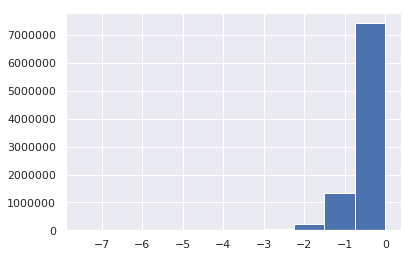

In [114]:
# dgwas_subset.loc[]
_=dgwas_subset_flt['pval'].apply(np.log10).hist()

In [115]:
sum(dgwas_subset_flt['pval']<1e-02)

96358

In [116]:
dgwas_subset['pval'].min()

1.9724299999999996e-103

In [117]:
dgwas_subset.head()

,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval
0,1:15791:C:T,T,5.428620e-09,0.000009,True,361194,0.003922,0.0,-0.425474,12.462200,-0.034141,0.972765
1,1:69487:G:A,A,5.748910e-06,0.009946,True,361194,4.152940,0.0,-0.003166,0.024411,-0.129706,0.896799
2,1:69569:T:C,C,1.877380e-04,0.324787,True,361194,135.620000,0.0,-0.002512,0.004378,-0.573866,0.566059
3,1:139853:C:T,T,5.662050e-06,0.009795,True,361194,4.090200,0.0,-0.003128,0.024411,-0.128127,0.898048
4,1:692794:CA:C,C,1.106400e-01,191.407000,False,361194,79924.700000,200.2,0.000158,0.000202,0.782302,0.434037


In [118]:
dgwas_subset_flt.shape

(9058943, 12)

In [119]:
dgwas_subset_flt.to_csv('/data/analysis/UKBB/processed/dgwas_subset_flt.tsv',sep='\t',)

In [121]:
dgwas_subset_flt.to_parquet('/data/analysis/UKBB/processed/dgwas_subset_flt.pqt',compression='gzip',
                           engine='fastparquet')

## Combining regulatory features

In [46]:
import glob
from os.path import exists,dirname,basename

In [54]:
i=0
for gffp in glob.iglob(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/RegulatoryFeatureActivity/*/homo_sapiens*.gff.gz'):
    dgff_regulation=pd.read_table(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/RegulatoryFeatureActivity/A549/homo_sapiens.GRCh37.A549.Regulatory_Build.regulatory_activity.20161117.gff.gz',
                             names=['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    dgff_regulation['tissue type']=basename(dirname(gffp))
    if i==0:
        dgff_regulation_combo=dgff_regulation.copy()
    else:
        dgff_regulation_combo=dgff_regulation_combo.append(dgff_regulation)
    del dgff_regulation
    print(dgff_regulation_combo.shape)
    i+=1
#     break

(280027, 10)
(560054, 10)
(840081, 10)
(1120108, 10)
(1400135, 10)
(1680162, 10)
(1960189, 10)
(2240216, 10)
(2520243, 10)
(2800270, 10)
(3080297, 10)
(3360324, 10)
(3640351, 10)
(3920378, 10)
(4200405, 10)
(4480432, 10)
(4760459, 10)
(5040486, 10)
(5320513, 10)
(5600540, 10)
(5880567, 10)
(6160594, 10)
(6440621, 10)
(6720648, 10)
(7000675, 10)
(7280702, 10)
(7560729, 10)
(7840756, 10)
(8120783, 10)
(8400810, 10)
(8680837, 10)
(8960864, 10)
(9240891, 10)
(9520918, 10)
(9800945, 10)
(10080972, 10)
(10360999, 10)
(10641026, 10)
(10921053, 10)
(11201080, 10)
(11481107, 10)
(11761134, 10)
(12041161, 10)
(12321188, 10)
(12601215, 10)
(12881242, 10)
(13161269, 10)
(13441296, 10)
(13721323, 10)
(14001350, 10)
(14281377, 10)
(14561404, 10)
(14841431, 10)
(15121458, 10)
(15401485, 10)
(15681512, 10)
(15961539, 10)
(16241566, 10)
(16521593, 10)
(16801620, 10)
(17081647, 10)
(17361674, 10)
(17641701, 10)
(17921728, 10)
(18201755, 10)
(18481782, 10)
(18761809, 10)
(19041836, 10)


In [84]:
dgff_regulation_combo.head()

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
index,,,,,,,,,,
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,H1_trophoblast,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,H1_trophoblast,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,H1_trophoblast,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,H1_trophoblast,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,H1_trophoblast,ENSR00000009711


In [83]:
840081-1120108

-280027

In [95]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns
sns.set('notebook')

In [97]:
%mkdir plot

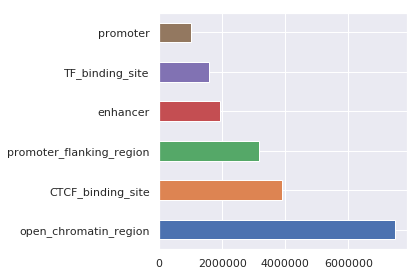

In [100]:
ax=dgff_regulation_combo['type'].value_counts().plot.barh()
plt.savefig('plot/bar_dgff_regulation_combo_type.svg')
plt.savefig('plot/bar_dgff_regulation_combo_type.png')
plt.tight_layout()

In [102]:
len(dgff_regulation_combo['regulatory_feature_stable_id'].unique())

280027

In [101]:
dgff_regulation_combo.head()

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
index,,,,,,,,,,
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,H1_trophoblast,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,H1_trophoblast,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,H1_trophoblast,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,H1_trophoblast,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,H1_trophoblast,ENSR00000009711


In [106]:
dgff_regulation_combo.loc[(dgff_regulation_combo['regulatory_feature_stable_id']=='ENSR00000408425'),:].shape

(68, 10)

In [108]:
len(dgff_regulation_combo['tissue type'].unique())

68

In [55]:
dgff_regulation_combo['regulatory_feature_stable_id']=dgff_regulation_combo['attributes'].apply(lambda x : [s.replace('regulatory_feature_stable_id=','') for s in x.split(';') if 'regulatory_feature_stable_id=' in s][0])

In [61]:
# dgff_regulation_combo.to_csv(f'{ddir}/ensembl/raw/dgff_regulation_combo.tsv',sep='\t')

In [62]:
f'{ddir}/ensembl/raw/dgff_regulation_combo.tsv'

'data/ensembl/raw/dgff_regulation_combo.tsv'

In [63]:
%ls -ltr data/ensembl/raw/dgff_regulation_combo.tsv

-rw-r--r-- 1 yizhenzhong cshl-hackathon 5540835004 Nov 11 02:15 data/ensembl/raw/dgff_regulation_combo.tsv


In [75]:
# to_table_pqt(dgff_regulation_combo.head(),'test.pqt')
#f'{ddir}/ensembl/raw/dgff_regulation_combo.pqt'
dgff_regulation_combo.loc[:,['chromosome',
 'source',
 'type',
 'start',
 'end',
 'score',
 'strand',
 'phase',
#  'attributes',
 'tissue type',
 'regulatory_feature_stable_id']].to_parquet('dgff_regulation_combo.pqt',engine='fastparquet',compression='gzip',)

In [77]:
dgff_regulation_combo["type"].value_counts()

open_chromatin_region       7489044
CTCF_binding_site           3892932
promoter_flanking_region    3164176
enhancer                    1920252
TF_binding_site             1566312
promoter                    1009120
Name: type, dtype: int64

In [80]:
dgff_regulation_combo["end"].max()

249240728

## read

In [6]:
dgff_regulation_combo=pd.read_parquet(f'{ddir}/ensembl/processed/dgff_regulation_combo.pqt',engine='fastparquet')

In [130]:
dgff_regulation_combo_tissue=dgff_regulation_combo.loc[((dgff_regulation_combo["tissue type"]=='Aorta') & (dgff_regulation_combo["chromosome"]=='12')),:]

In [129]:
dgff_regulation_combo['chromosome'].unique()

array(['15', '7', '22', '19', '1', '6', '3', '20', '2', '10', '21', '9',
       '5', '16', '14', '12', '13', 'X', '17', '18', '4', '11', '8',
       'GL000216.1', 'GL000217.1', 'GL000225.1', 'GL000208.1',
       'GL000196.1', 'GL000213.1', 'GL000204.1', 'GL000210.1',
       'GL000220.1', 'GL000192.1', 'GL000215.1', 'GL000221.1', 'Y',
       'GL000241.1', 'GL000198.1', 'GL000206.1', 'GL000219.1',
       'GL000231.1', 'GL000249.1', 'GL000212.1', 'GL000228.1',
       'GL000191.1', 'GL000195.1', 'GL000199.1', 'GL000194.1',
       'GL000234.1', 'GL000222.1', 'GL000205.1', 'GL000223.1',
       'GL000229.1', 'GL000243.1', 'GL000209.1', 'GL000201.1',
       'GL000227.1', 'GL000214.1', 'GL000193.1', 'GL000218.1',
       'GL000200.1', 'GL000202.1', 'GL000211.1', 'GL000237.1',
       'GL000242.1', 'GL000197.1', 'GL000230.1', 'GL000248.1',
       'GL000224.1', 'GL000244.1', 'GL000232.1', 'GL000226.1',
       'GL000235.1', 'GL000240.1'], dtype=object)

In [134]:
print(dgff_regulation_combo_tissue.shape)

(13420, 10)


In [132]:
dgff_regulation_combo_tissue.head()

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
index,,,,,,,,,,
25,12,Regulatory_Build,CTCF_binding_site,49681801,49683000,.,.,.,Aorta,ENSR00000069585
36,12,Regulatory_Build,promoter_flanking_region,6887201,6888800,.,.,.,Aorta,ENSR00000065041
46,12,Regulatory_Build,promoter,109592200,109593401,.,.,.,Aorta,ENSR00000076948
62,12,Regulatory_Build,TF_binding_site,71946831,71947398,.,.,.,Aorta,ENSR00000072663
66,12,Regulatory_Build,open_chromatin_region,62397539,62397814,.,.,.,Aorta,ENSR00000360225


In [ ]:
df=dgwas_subset_flt['variant'].apply(lambda x : x.split(':')).apply(pd.Series)

In [ ]:
dgwas_subset_flt=dgwas_subset_flt.join(df)

In [122]:
dgwas_subset_flt.head()

,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval
4,1:692794:CA:C,C,0.110640,191.4070,False,361194,79924.7,200.2000,0.000158,0.000202,0.782302,0.434037
5,1:693731:A:G,G,0.115830,200.3860,False,361194,83674.4,206.1610,0.000095,0.000191,0.499534,0.617404
6,1:707522:G:C,C,0.097303,168.3350,False,361194,70290.8,174.3530,0.000126,0.000215,0.588785,0.556006
7,1:717587:G:A,A,0.015688,27.1403,False,361194,11332.9,32.0549,0.000538,0.000513,1.049410,0.293991
9,1:730087:T:C,C,0.056460,97.6761,False,361194,40786.2,107.9730,0.000312,0.000266,1.173680,0.240525


In [ ]:
# save gwas variants as bed %%file


In [131]:
bed_colns = ['chromosome','start','end','id','NM','strand']

In [78]:
dgff_regulation_combo_tissue.loc[:,['chromosome','start','end','regulatory_feature_stable_id','NM','strand']].to_csv(f'{ddir}/ensembl/processed/dgff_regulation_combo_tissue.bed',
                                                                                                                     index=False,
                                                                                                                     header=False,sep='\t')

/data/env/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [ ]:
# dgff_regulation_combo.loc[:,"att"]

In [51]:
# trying to collapse the tissue wise regulation features
# cols_dgff_regulation_combo=dgff_regulation_combo.columns.tolist()

# for ch in dgff_regulation_combo['chromosome'].unique():
#     for ft in dgff_regulation_combo['type'].unique():
#         dgff_regulation_combo_ch=dgff_regulation_combo.loc[((dgff_regulation_combo['chromosome']==ch) & (dgff_regulation_combo['type']==ft)),:]
#         dgff_regulation_combo_ch=dgff_regulation_combo_ch.reset_index()
#         break
#     break

# print(dgff_regulation_combo_ch.shape)

# # dgff_regulation_combo_summed=pd.DataFrame(columns=[ft],
# # #                                           index=[1,2]
# # index=range(dgff_regulation_combo_ch['start'].min(),dgff_regulation_combo_ch['end'].max()+1),
# #                                          )
# # dgff_regulation_combo_summed[ft]=0
# # dgff_regulation_combo_summed['chromosome']=ch
# # print(dgff_regulation_combo_summed.shape)

# for idx in dgff_regulation_combo_ch.index:
#     start,end= dgff_regulation_combo_ch.loc[idx,'start'],dgff_regulation_combo_ch.loc[idx,'end']
#     dgff_regulation_combo_summed.loc[start:end,ft]=dgff_regulation_combo_summed.loc[start:end,ft]+1
# #     break

# dgff_regulation_combo_summed.loc[start:end,ft]

In [58]:
dgff_regulation_combo_summed.head()

,TF_binding_site,chromosome
20635801,NaN,15
20635802,NaN,15
20635803,NaN,15
20635804,NaN,15
20635805,NaN,15


In [ ]:
dgff_regulation_combo_summed.TF_binding_site.value_counts()

In [59]:
dgff_regulation_combo_summed.shape

(81885692, 2)

In [ ]:
TF_binding_site

In [54]:
dgff_regulation_combo_ch.head()

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
index,,,,,,,,,,
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,H1_trophoblast,ENSR00000368862
29,15,Regulatory_Build,TF_binding_site,65346662,65347060,.,.,.,H1_trophoblast,ENSR00000367365
44,15,Regulatory_Build,TF_binding_site,96804888,96805390,.,.,.,H1_trophoblast,ENSR00000110183
966,15,Regulatory_Build,TF_binding_site,50670004,50670507,.,.,.,H1_trophoblast,ENSR00000103447
1702,15,Regulatory_Build,TF_binding_site,69435929,69436405,.,.,.,H1_trophoblast,ENSR00000367570


In [48]:
end

102119129

In [39]:
dgff_regulation_combo_ch.head().loc[:,['start','end']].to_tuples()()

{'start': {0: 102118789,
  29: 65346662,
  44: 96804888,
  966: 50670004,
  1702: 69435929},
 'end': {0: 102119129,
  29: 65347060,
  44: 96805390,
  966: 50670507,
  1702: 69436405}}

In [30]:
dgff_regulation_combo_summed.shape

(81885692, 1)

In [31]:
dgff_regulation_combo_ch.head()

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
index,,,,,,,,,,
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,H1_trophoblast,ENSR00000368862
29,15,Regulatory_Build,TF_binding_site,65346662,65347060,.,.,.,H1_trophoblast,ENSR00000367365
44,15,Regulatory_Build,TF_binding_site,96804888,96805390,.,.,.,H1_trophoblast,ENSR00000110183
966,15,Regulatory_Build,TF_binding_site,50670004,50670507,.,.,.,H1_trophoblast,ENSR00000103447
1702,15,Regulatory_Build,TF_binding_site,69435929,69436405,.,.,.,H1_trophoblast,ENSR00000367570


In [27]:
dgff_regulation_combo_summed

,chromosome,source,type,start,end,score,strand,phase,tissue type,regulatory_feature_stable_id
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
list(range(1,5))

[1, 2, 3, 4]

In [8]:
# dpeaksgff=pd.read_table(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/Peaks/A549/CTCF/homo_sapiens.GRCh37.A549.CTCF.SWEmbl_R0005_IDR.peaks.20161117.gff.gz')

In [65]:
dgff_regulation_combo.head()

,chromosome,source,type,start,end,score,strand,phase,attributes,tissue type,regulatory_feature_stable_id
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,activity=INACTIVE;bound_end=102119230;bound_st...,H1_trophoblast,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,activity=INACTIVE;bound_end=1619683;bound_star...,H1_trophoblast,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,activity=INACTIVE;bound_end=34001716;bound_sta...,H1_trophoblast,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,activity=REPRESSED;bound_end=31806200;bound_st...,H1_trophoblast,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,activity=INACTIVE;bound_end=60893296;bound_sta...,H1_trophoblast,ENSR00000009711


In [66]:
dgff_regulation_combo.columns.tolist()

['chromosome',
 'source',
 'type',
 'start',
 'end',
 'score',
 'strand',
 'phase',
 'attributes',
 'tissue type',
 'regulatory_feature_stable_id']

In [11]:
dgff_regulation.head()

,chromosome,source,type,start,end,score,strand,phase,attributes,regulatory_feature_stable_id
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,activity=INACTIVE;bound_end=102119230;bound_st...,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,activity=INACTIVE;bound_end=1619683;bound_star...,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,activity=INACTIVE;bound_end=34001716;bound_sta...,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,activity=REPRESSED;bound_end=31806200;bound_st...,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,activity=INACTIVE;bound_end=60893296;bound_sta...,ENSR00000009711


In [42]:
dgff_regulation.shape

(280027, 10)

In [44]:
dgff_regulation["type"].value_counts()

open_chromatin_region       110133
CTCF_binding_site            57249
promoter_flanking_region     46532
enhancer                     28239
TF_binding_site              23034
promoter                     14840
Name: type, dtype: int64